# **DATA UNDERSTANDING**

## **Context**

Sebuah perusahaan yang bergerak dibidang jual beli product ingin mengetahui gambaran umum dari bisnis yang mereka jalankan. Terdapat sebuah database yg menunjukan detail transaksi. Dari database tersebut, perusahaan ingin mendapatkan insight yang dapat dijalankan. Sehingga nantinya pengambilan keputusan untuk kebutuhan sales atau profit oriented dapat tepat sasaran.

## **Database Information**

Sumber Database : https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Database yang dimiliki mempunyai 13 tabel, yaitu:
- Categories : Menyimpan informasi data tentang Categori Product
- CustomerCustomerDemo : Menyimpan informasi data tentang customer demografi
- CustomerDemographics : Menyimpan informasi data tentang customer demografi
- Customers : Menyimpan informasi data tentang customer secara lengkap
- Employees : Menyimpan informasi data tentang karyawan
- EmployeeTerritories : Menyimpan informasi data tentang territori karyawan
- OrderDetails : Menyimpan informasi data tentang Order produk secara detail
- Orders : Menyimpan informasi data tentang Order product
- Products : Menyimpan informasi data tentang product 
- Region : Menyimpan informasi data tentang Region atau Daerah
- Shippers : Menyimpan informasi data tentang jasa Pengiriman
- Suppliers : Menyimpan informasi data tentang Suppliers
- Territories : Menyimpan informasi data tentang Teritories

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

# **DATABASE**

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``Northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.


In [1]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [2]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = '12345678',
    database = 'Northwind'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [3]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## **Data Detail & Keuntungan Transaksi**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari beberapa tabel, yaitu tabel ```Costumer```, ```Orders```, ```OrderDetails```, ```Supplier```, ```Shippers``` dan ```Products```. Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan. Informasi-informasi yang dianggap penting saja lah yang diambil. Informasi yang diambil antara lain adalah :
- CustomerID dari tabel Customers
- CompanyName dari tabel Customers
- Address dari tabel Customers
- City dari tabel Customers
- Country dari tabel Customers
- OrderID dari tabel Orders
- OrderDate dari tabel Orders
- RequiredDate dari tabel Orders
- ShippedDate dari tabel Orders
- ShipVia dari tabel Orders
- Quantity dari tabel OrderDetails
- UnitPrice dari tabel OrderDetails
- ProductID dari tabel OrderDetails
- Discount dari tabel OrderDetails
- ProductName dari tabel Products

- SupplierID dari tabel Products
- UnitInStock dari tabel Products
- UnitPrice dari tabel Products
- CompanyName dari tabel Suppliers
- CompanyName dari tabel Shippers

- CategoryName dari tabel Categories
- Discount
- Sisa_Stock

Untuk mengisi tabel Discount dari tabel OrderDetail = UnitPrice dari tabel Products - UnitPrice dari tabel OrderDetails dan
Untuk mengisi tabel Sisa_stock = UnitsInStock (Products) - Quantity (OrderDetails)

Relationship antar tabel :

- CustomerID(Customers) > CustomerID(Orders)
- OrderID(Orders) > OrderID(OrderDetail)
- ShipVia(Orders) > ShipperID(Shippers)
- ProductID(OrderDetail) > ProductID(Products)
- SupplierID(Products) > SupplierID(Suppliers)


Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [4]:
# Query 1

tabel1 = sql_table (
    '''
select c.CustomerID, c.CompanyName, c.Address, c.City, c.Country,
	o.OrderID, o.OrderDate, o.RequiredDate, o.ShippedDate, o.ShipVia,
    od.Quantity, od.ProductID, od.UnitPrice UnitPriceOD,
    p.ProductName, p.SupplierID, p.UnitsInStock, p.UnitPrice UnitPriceP,
    su.CompanyName, sh.CompanyName, ca.CategoryName,
    round((p.UnitPrice - od.UnitPrice),1) Discount, (p.UnitsInStock - od.Quantity) Sisa_Stock
from Customers c
left join Orders o on c.CustomerID = o.CustomerID
left join OrderDetails od on o.OrderID = od.OrderID
left join Products p on od.ProductID = p.ProductID
left join Suppliers su on p.SupplierID = su.SupplierID
left join Shippers sh on o.ShipVia = sh.ShipperID
left join Categories ca on p.CategoryID = ca.CategoryID;
    '''
)

tabel1.head()

,CustomerID,CompanyName,Address,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,...,UnitPriceOD,ProductName,SupplierID,UnitsInStock,UnitPriceP,CompanyName,CompanyName,CategoryName,Discount,Sisa_Stock
0,ALFKI,Alfreds Futterkiste,Obere Str. 57,Berlin,Germany,10643.0,1997-08-25,1997-09-22,1997-09-02,1.0,...,45.6000,Rssle Sauerkraut,12.0,26.0,45.6000,Plutzer Lebensmittelgromrkte AG,Speedy Express,Produce,0.0,11.0
1,ALFKI,Alfreds Futterkiste,Obere Str. 57,Berlin,Germany,10643.0,1997-08-25,1997-09-22,1997-09-02,1.0,...,18.0000,Chartreuse verte,18.0,69.0,18.0000,Aux joyeux ecclsiastiques,Speedy Express,Beverages,0.0,48.0
2,ALFKI,Alfreds Futterkiste,Obere Str. 57,Berlin,Germany,10643.0,1997-08-25,1997-09-22,1997-09-02,1.0,...,12.0000,Spegesild,21.0,95.0,12.0000,Lyngbysild,Speedy Express,Seafood,0.0,93.0
3,ALFKI,Alfreds Futterkiste,Obere Str. 57,Berlin,Germany,10692.0,1997-10-03,1997-10-31,1997-10-13,2.0,...,43.9000,Vegie-spread,7.0,24.0,43.9000,"Pavlova, Ltd.",United Package,Condiments,0.0,4.0
4,ALFKI,Alfreds Futterkiste,Obere Str. 57,Berlin,Germany,10702.0,1997-10-13,1997-11-24,1997-10-21,1.0,...,10.0000,Aniseed Syrup,1.0,13.0,10.0000,Exotic Liquids,Speedy Express,Condiments,0.0,7.0


## **Data Categories Produk, Kuantitas, dan Total Harga Beli**

Data yang kedua ini merupakan informasi yang bisa menjadi data tambahan untuk melihat gambaran tentang data yang dimiliki. Data ini memuat Categoris dari produk yang tersedia mulai dari Beverages hingga Seafood lengkap dengan banyaknya Categories produk, kuantitas, serta harga Totalnya. Dari sini bisa dilihat gambaran apakah kuantitas akan memberikan pengaruh terhadap harga beli. Dari data ini juga bisa dilihat keadaan stock barang, serta bagaimana gambaran jika suatu saat ingin menambah, entah itu jenis produk ataupun kuantitas dengan mempertimbangkan harganya.

In [5]:
# Query 2 (Aggregating)

tabel2 = sql_table(
    '''
select 
	c.CategoryName, 
    count(CategoryName) Banyak_Produk, 
    sum(Quantity) JumlahQuantity, sum(od.UnitPrice) JumlahHargaBeli
from Products p
left join Categories c on p.CategoryID = c.CategoryID
left join OrderDetails od on od.ProductID = p.ProductID
group by CategoryName
order by Banyak_Produk;
    '''
)

tabel2.head(8)

,CategoryName,Banyak_Produk,JumlahQuantity,JumlahHargaBeli
0,Produce,136,2990,4786.4500
1,Meat/Poultry,173,4199,7417.3300
2,Grains/Cereals,196,4562,4164.3000
3,Condiments,216,5298,4605.3000
4,Seafood,330,7681,6290.7800
5,Confections,334,7906,7549.3000
6,Dairy Products,366,9149,9875.8000
7,Beverages,404,9532,11811.6500


# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **Data Anomalies**

In [6]:
# Check Info Tabel1

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2159 non-null   object        
 1   CompanyName   2159 non-null   object        
 2   Address       2157 non-null   object        
 3   City          2157 non-null   object        
 4   Country       2157 non-null   object        
 5   OrderID       2155 non-null   float64       
 6   OrderDate     2155 non-null   datetime64[ns]
 7   RequiredDate  2155 non-null   datetime64[ns]
 8   ShippedDate   2082 non-null   datetime64[ns]
 9   ShipVia       2155 non-null   float64       
 10  Quantity      2155 non-null   float64       
 11  ProductID     2155 non-null   float64       
 12  UnitPriceOD   2155 non-null   object        
 13  ProductName   2155 non-null   object        
 14  SupplierID    2155 non-null   float64       
 15  UnitsInStock  2155 non-null   float64 

## **Melihat Data Sekilas Dari General Info**

Mari sejenak melihat apa yang ditampilkan pada general info yang disajikan di atas. Terlihat bahwa secara keseluruhan terdapat 2159 baris data dengan total 18 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, datetime dan float. Oke, mari sejenak mengesampingkan tipe data. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, tidak semua kolom atau feature yang memiliki data lengkap. Yang paling terlihat jomplang adalah pada ```ShippedDate```. Features tersebut kehilangan beberapa data sekitar dibawah 100 data. Selain dari itu, ada beberapa feature yang datanya juga missing, yang nantinya akan ditampilkan pada bagian berikutnya. 
**Kesimpulan pertama adalah bahwa terdapat *missing value* yang harus ditanggulangi.**

Fokus berikutnya adalah perhatikan pada features berikut ini: 
- UnitPriceP
- UnitPriceOD
- Discount

Pada Informasi diatas adalah UnitPriceP , UnitPriceOD dan Discount type datanya masih berbentuk object dan harus dirubah menjadi tipe data numeric.



In [7]:
# Check Missing Value Percentage

tabel1.isnull().sum()

CustomerID       0
CompanyName      0
Address          2
City             2
Country          2
OrderID          4
OrderDate        4
RequiredDate     4
ShippedDate     77
ShipVia          4
Quantity         4
ProductID        4
UnitPriceOD      4
ProductName      4
SupplierID       4
UnitsInStock     4
UnitPriceP       4
CompanyName      4
CompanyName      4
CategoryName     4
Discount         4
Sisa_Stock       4
dtype: int64

## **Missing Values**

Telah dijelaskan sebelumnya, terdapat beberapa feature yang memang memiliki missing values. Yang paling jadi sorotan adalah ShippedDate yang memiliki total missing valuenya 77. Artinya, jika missing valuenya dihilangkan dengan melihat row atau barisnya, 77 dari data yang dimiliki akan hilang, yang berarti akan mengakibatkan hilangnya informasi.

Lalu, bagaimana dengan feature lainnya? Selain dari ShippedDate, hampir semua feature memiliki missing value sebanyak 4 dan 2. Dari segi angka, bisa diasumsikan bahwa 4 dan 2 data yang hilang tersebut adalah bagian dari row yang sama yang merupakan data yang betul-betul kosong dari database-nya. Sehingga, cara untuk mengatasinya cukup dengan melakukan drop data termasuk untuk shippedDate, meskipun total missing valuenya mencapai 77 data (hal tersebut karena 77 dari 2159 data hanya kurang lebih 5% data, sehingga tidak akan mengurangi informasi secara signifikan).

## **Handling Anomalies**

Setelah mengetahui hal-hal yang harus 'dibereskan' terlebih dahulu, maka pada bagian ini, hal-hal tersebut harus diatasi. Pertama, masalah missing value. Sebenarnya pada bagian sebelumnya sudah diberi tahu apa saja yang harus dilakukan untuk mengatasi masalah tersebut. Maka akan kita lakukan missing value dari setiap row-nya dihapus.

In [8]:
# Remove Missing Value 

tabel1.dropna(inplace = True)

In [9]:
# Recheck Info

tabel1.isnull().sum()

CustomerID      0
CompanyName     0
Address         0
City            0
Country         0
OrderID         0
OrderDate       0
RequiredDate    0
ShippedDate     0
ShipVia         0
Quantity        0
ProductID       0
UnitPriceOD     0
ProductName     0
SupplierID      0
UnitsInStock    0
UnitPriceP      0
CompanyName     0
CompanyName     0
CategoryName    0
Discount        0
Sisa_Stock      0
dtype: int64

In [10]:
#recheck nan 

tabel1.isna().sum()

CustomerID      0
CompanyName     0
Address         0
City            0
Country         0
OrderID         0
OrderDate       0
RequiredDate    0
ShippedDate     0
ShipVia         0
Quantity        0
ProductID       0
UnitPriceOD     0
ProductName     0
SupplierID      0
UnitsInStock    0
UnitPriceP      0
CompanyName     0
CompanyName     0
CategoryName    0
Discount        0
Sisa_Stock      0
dtype: int64

## **Recheck Missing Value Information**

Setelah melakukan proses drop missing value, selanjutnya adalah melakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Benar saja, jika melihat data pada output di atas, sudah tidak terdapat lagi missing value sama sekali, dan pada feature ```RequiredDate``` serta ```feature yg lainnya``` sudah tidak ada juga (karena sudah di-dropna). Untuk masing-masing feature juga sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi.

## **Mengubah Tipe Data Yang Salah**

Oke, telah disebutkan juga sebelumnya bahwa ada tipe data yang tidak sesuai. Features tersebut terlebih dahulu diubah agar fungsionalitasnya kembali ke hakekatnya. Numerik akan diperlakukan sebagai tipe data numerik, begitu juga dengan tipe data yg lainnya. Tujuannya tentu saja agar features tersebut dapat dipergunakan sebagaimana mestinya.

Disini kita akan mengubah 
- UnitpriceP    : Object di ubah menjadi Numeric
- UnitpriceOD   : Object di ubah menjadi Numeric
- Discount      : Object di ubah menjadi Numeric

In [11]:
# Change Spesific Column To Numeric Format

tabel1['UnitPriceP'] = pd.to_numeric(tabel1['UnitPriceP'])
tabel1['UnitPriceOD'] = pd.to_numeric(tabel1['UnitPriceOD'])
tabel1['Discount'] = pd.to_numeric(tabel1['Discount'])



In [12]:
# Recheck Info

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2158
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    2082 non-null   object        
 1   CompanyName   2082 non-null   object        
 2   Address       2082 non-null   object        
 3   City          2082 non-null   object        
 4   Country       2082 non-null   object        
 5   OrderID       2082 non-null   float64       
 6   OrderDate     2082 non-null   datetime64[ns]
 7   RequiredDate  2082 non-null   datetime64[ns]
 8   ShippedDate   2082 non-null   datetime64[ns]
 9   ShipVia       2082 non-null   float64       
 10  Quantity      2082 non-null   float64       
 11  ProductID     2082 non-null   float64       
 12  UnitPriceOD   2082 non-null   float64       
 13  ProductName   2082 non-null   object        
 14  SupplierID    2082 non-null   float64       
 15  UnitsInStock  2082 non-null   float64 

## **Recheck Data Information**

Bagian sebelumnya, 1 features yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut. Mari fokus ke data yang sudah disebutkan sebelumnya. 

features yang seharusnya bertipe data Numeric, yaitu UnitPricep, UnitPriceOD, dan Discount sudah menjadi tipe data Numeric. Dengan begini, perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali yang kedua sudah teratasi. 

In [13]:
# Check Dupliacate

tabel1[tabel1.duplicated()]

,CustomerID,CompanyName,Address,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,...,UnitPriceOD,ProductName,SupplierID,UnitsInStock,UnitPriceP,CompanyName,CompanyName,CategoryName,Discount,Sisa_Stock


## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

## **Feature 'ProcessingDate'**

Data awal menunjukan terdapat 3 features yang merupakan tipe data datetime. Artinya, kita dapat melakukan ekstraksi informasi tambahan dari kedua features tersebut. Sebelumnya, kita perlu tahu dulu definisi dari kedua tabel tersebut. RequiredDate secara singkat dapat diartikan sebagai waktu atau kapan barang tersebut dibutuhkan, sedangkan ShippedDate adalah waktu dikirimkannya barang tersebut dan OrderDate adalah waktu barang diorder. 

Melihat ketiga definisi tersebut, sebuah informasi dapat diambil, yakni seberapa lama waktu proses barangnya dari waktu pengiriman hingga dibutuhkan. Oleh karena itu, untuk mendapatkan informasinya, maka perlu dilakukan pengurangan antara requiredDate dan juga shippedDate. Mungkin akan timbul pertanyaan, apakah waktu dapat dikurangkan? Jawabannya, bisa. Output yang keluar nantinya akan berupa selisih atau lamanya waktu proses tersebut dalam satuan hari.

In [14]:
# Add New Column (Processing Day)

tabel1['ProcessingDate'] = tabel1['RequiredDate'] - tabel1['ShippedDate']
tabel1.sample(5)

,CustomerID,CompanyName,Address,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,...,ProductName,SupplierID,UnitsInStock,UnitPriceP,CompanyName,CompanyName,CategoryName,Discount,Sisa_Stock,ProcessingDate
821,HUNGO,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,Ireland,10646.0,1997-08-27,1997-10-08,1997-09-03,3.0,...,Chai,1.0,39.0,18.00,Exotic Liquids,Federal Shipping,Beverages,0.0,24.0,35 days
190,BONAP,Bon app',"12, rue des Bouchers",Marseille,France,10732.0,1997-11-06,1997-12-04,1997-11-07,1.0,...,Lakkalikri,23.0,57.0,18.00,Karkki Oy,Speedy Express,Beverages,0.0,37.0,27 days
1964,VAFFE,Vaffeljernet,Smagsloget 45,rhus,Denmark,10946.0,1998-03-12,1998-04-09,1998-03-19,2.0,...,Guaran Fantstica,10.0,20.0,4.50,Refrescos Americanas LTDA,United Package,Beverages,0.0,-5.0,21 days
32,ANTON,Antonio Moreno Taquera,Mataderos 2312,Mxico D.F.,Mexico,10677.0,1997-09-22,1997-10-20,1997-09-26,3.0,...,Gumbr Gummibrchen,11.0,15.0,31.23,Heli Swaren GmbH & Co. KG,Federal Shipping,Confections,0.0,-15.0,24 days
1435,QUICK,QUICK-Stop,Taucherstrae 10,Cunewalde,Germany,10991.0,1998-04-01,1998-04-29,1998-04-07,1.0,...,Lakkalikri,23.0,57.0,18.00,Karkki Oy,Speedy Express,Beverages,0.0,-33.0,22 days


## **Unique Value 'ProcessingDate'**

Oke, setelah membuat sebuah kolom baru yang bernama ProcessingDate sebagaimana yang sudah didefinisikan sebelumnya, mari kita cek bagaimana data tersebut. Jika melihat dari preview output sebelumnya, tidak ada keanehan. Lantas bagaimana jika kita melihat lebih dalam ke dalam feature baru ini? Berikut ini penampakan hasil yang memperlihatkan unique values beserta jumlah data di setiap unique values-nya.

In [15]:
# Check Data Anomalies in Date Time Format

tabel1['ProcessingDate'].value_counts()

21 days     227
22 days     191
23 days     165
25 days     160
19 days     159
24 days     158
26 days     145
20 days     139
18 days      98
16 days      39
7 days       37
10 days      37
27 days      35
17 days      34
5 days       31
36 days      31
8 days       30
4 days       27
9 days       24
35 days      23
34 days      23
11 days      22
6 days       21
-1 days      20
13 days      18
-7 days      16
39 days      16
-6 days      15
15 days      15
32 days      15
3 days       11
0 days       10
-4 days       8
14 days       8
30 days       6
-5 days       6
1 days        6
-2 days       6
33 days       6
37 days       5
2 days        5
-16 days      5
12 days       5
-9 days       4
-18 days      4
38 days       3
41 days       3
-8 days       2
-3 days       2
28 days       2
-11 days      2
-23 days      1
-17 days      1
Name: ProcessingDate, dtype: int64

## **Anomali Pada Processing Date**

Melihat output unique values beserta dengan banyaknya data di setiap unique values tersebut, apakah terlihat sesuatu yang aneh? Yap benar, terdapat sebuah waktu yang menunjukan nilai minus, -1 days terdapat 20, -11 days ada 2, -23 days ada 1, -17 days ada 1. Ada apa? Sebenarnya ada 2 asumsi yang bisa diambil. Asumsi pertama adalah murni kesalahan input saat memasukan ke dalam database, atau asumsi yang kedua adalah pengirimannya mengalami keterlambatan. 

Untuk asumsi yang pertama, cara mengatasinya cukup dengan drop 20 data yang salah input dan data yg lainnya. Dengan kata lain, kita menganggap bahwa data tersebut 'salah' dan dapat dibuang (karena jumlahnya yang tidak banyak). Untuk asumsi kedua, data ini bisa saja dipertahankan dan bisa dilakukan analisis lebih lanjut untuk mengetahui letak permasalahannya.

Di sini, asumsi yang akan digunakan adalah asumsi yang kedua, yaitu kita akan mengasumsikan terdapat keterlambatan dalam pengiriman. Nantinya, kita akan coba melakukan analisis untuk data ini.

In [16]:
# Handling Date Time Format Anomalies (Check Data First)
# Pengiriman telat 1 hari

tabel1[tabel1['ProcessingDate'] == '-1 days']

,CustomerID,CompanyName,Address,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,...,ProductName,SupplierID,UnitsInStock,UnitPriceP,CompanyName,CompanyName,CategoryName,Discount,Sisa_Stock,ProcessingDate
73,BERGS,Berglunds snabbkp,Berguvsvgen 8,Lule,Sweden,10280.0,1996-08-14,1996-09-11,1996-09-12,1.0,...,Guaran Fantstica,10.0,20.0,4.50,Refrescos Americanas LTDA,Speedy Express,Beverages,0.9,8.0,-1 days
74,BERGS,Berglunds snabbkp,Berguvsvgen 8,Lule,Sweden,10280.0,1996-08-14,1996-09-11,1996-09-12,1.0,...,Pt chinois,25.0,115.0,24.00,Ma Maison,Speedy Express,Meat/Poultry,4.8,95.0,-1 days
75,BERGS,Berglunds snabbkp,Berguvsvgen 8,Lule,Sweden,10280.0,1996-08-14,1996-09-11,1996-09-12,1.0,...,Rhnbru Klosterbier,12.0,125.0,7.75,Plutzer Lebensmittelgromrkte AG,Speedy Express,Beverages,1.6,95.0,-1 days
695,GREAL,Great Lakes Food Market,2732 Baker Blvd.,Eugene,USA,10816.0,1998-01-06,1998-02-03,1998-02-04,2.0,...,Cte de Blaye,18.0,17.0,263.50,Aux joyeux ecclsiastiques,United Package,Beverages,0.0,-13.0,-1 days
696,GREAL,Great Lakes Food Market,2732 Baker Blvd.,Eugene,USA,10816.0,1998-01-06,1998-02-03,1998-02-04,2.0,...,Tarte au sucre,29.0,17.0,49.30,Forts d'rables,United Package,Confections,0.0,-3.0,-1 days
859,ISLAT,Island Trading,Garden House Crowther Way,Cowes,UK,10749.0,1997-11-20,1997-12-18,1997-12-19,2.0,...,Gnocchi di nonna Alice,26.0,21.0,38.00,Pasta Buttini s.r.l.,United Package,Grains/Cereals,0.0,6.0,-1 days
860,ISLAT,Island Trading,Garden House Crowther Way,Cowes,UK,10749.0,1997-11-20,1997-12-18,1997-12-19,2.0,...,Raclette Courdavault,28.0,79.0,55.00,Gai pturage,United Package,Dairy Products,0.0,73.0,-1 days
861,ISLAT,Island Trading,Garden House Crowther Way,Cowes,UK,10749.0,1997-11-20,1997-12-18,1997-12-19,2.0,...,Lakkalikri,23.0,57.0,18.00,Karkki Oy,United Package,Beverages,0.0,47.0,-1 days
1170,MORGK,Morgenstern Gesundkost,Heerstr. 22,Leipzig,Germany,10779.0,1997-12-16,1998-01-13,1998-01-14,2.0,...,Pavlova,7.0,29.0,17.45,"Pavlova, Ltd.",United Package,Confections,0.0,9.0,-1 days
1171,MORGK,Morgenstern Gesundkost,Heerstr. 22,Leipzig,Germany,10779.0,1997-12-16,1998-01-13,1998-01-14,2.0,...,Tarte au sucre,29.0,17.0,49.30,Forts d'rables,United Package,Confections,0.0,-3.0,-1 days


In [17]:
# Handling Date Time Format Anomalies (Check Data First)
# pengiriman telat 11 hari

tabel1[tabel1['ProcessingDate'] == '-11 days']


,CustomerID,CompanyName,Address,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,...,ProductName,SupplierID,UnitsInStock,UnitPriceP,CompanyName,CompanyName,CategoryName,Discount,Sisa_Stock,ProcessingDate
195,BONAP,Bon app',"12, rue des Bouchers",Marseille,France,10827.0,1998-01-12,1998-01-26,1998-02-06,2.0,...,Ikura,4.0,31.0,31.0,Tokyo Traders,United Package,Seafood,0.0,16.0,-11 days
196,BONAP,Bon app',"12, rue des Bouchers",Marseille,France,10827.0,1998-01-12,1998-01-26,1998-02-06,2.0,...,Chartreuse verte,18.0,69.0,18.0,Aux joyeux ecclsiastiques,United Package,Beverages,0.0,48.0,-11 days


In [18]:
# Handling Date Time Format Anomalies (Check Data First)
# pengiriman telat 23 hari

tabel1[tabel1['ProcessingDate'] == '-23 days']


,CustomerID,CompanyName,Address,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,...,ProductName,SupplierID,UnitsInStock,UnitPriceP,CompanyName,CompanyName,CategoryName,Discount,Sisa_Stock,ProcessingDate
674,GOURL,Gourmet Lanchonetes,"Av. Brasil, 442",Campinas,Brazil,10777.0,1997-12-15,1997-12-29,1998-01-21,2.0,...,Singaporean Hokkien Fried Mee,20.0,26.0,14.0,Leka Trading,United Package,Grains/Cereals,0.0,6.0,-23 days


In [19]:
# Handling Date Time Format Anomalies (Check Data First)

tabel1[tabel1['ProcessingDate'] == '-17 days']


,CustomerID,CompanyName,Address,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,...,ProductName,SupplierID,UnitsInStock,UnitPriceP,CompanyName,CompanyName,CategoryName,Discount,Sisa_Stock,ProcessingDate
166,BOLID,Blido Comidas preparadas,"C/ Araquil, 67",Madrid,Spain,10970.0,1998-03-24,1998-04-07,1998-04-24,1.0,...,Filo Mix,24.0,38.0,7.0,"G'day, Mate",Speedy Express,Grains/Cereals,0.0,-2.0,-17 days


## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [20]:
# Clean Data

tabel1.sample(20)

,CustomerID,CompanyName,Address,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,...,ProductName,SupplierID,UnitsInStock,UnitPriceP,CompanyName,CompanyName,CategoryName,Discount,Sisa_Stock,ProcessingDate
351,EASTC,Eastern Connection,35 King George,London,UK,11024.0,1998-04-15,1998-05-13,1998-04-20,1.0,...,Gumbr Gummibrchen,11.0,15.0,31.23,Heli Swaren GmbH & Co. KG,Speedy Express,Confections,0.0,3.0,23 days
812,HUNGO,Hungry Owl All-Night Grocers,8 Johnstown Road,Cork,Ireland,10429.0,1997-01-29,1997-03-12,1997-02-07,2.0,...,Vegie-spread,7.0,24.0,43.90,"Pavlova, Ltd.",United Package,Condiments,8.8,-11.0,33 days
1377,QUICK,QUICK-Stop,Taucherstrae 10,Cunewalde,Germany,10451.0,1997-02-19,1997-03-05,1997-03-12,3.0,...,Wimmers gute Semmelkndel,12.0,22.0,33.25,Plutzer Lebensmittelgromrkte AG,Federal Shipping,Grains/Cereals,6.7,-13.0,-7 days
933,LAMAI,La maison d'Asie,1 rue Alsace-Lorraine,Toulouse,France,10454.0,1997-02-21,1997-03-21,1997-02-25,3.0,...,Spegesild,21.0,95.0,12.00,Lyngbysild,Federal Shipping,Seafood,2.4,85.0,24 days
1227,OTTIK,Ottilies Kseladen,Mehrheimerstr. 369,Kln,Germany,10554.0,1997-05-30,1997-06-27,1997-06-05,3.0,...,Original Frankfurter grne Soe,12.0,32.0,13.00,Plutzer Lebensmittelgromrkte AG,Federal Shipping,Condiments,0.0,22.0,22 days
1756,SEVES,Seven Seas Imports,90 Wadhurst Rd.,London,UK,10388.0,1996-12-19,1997-01-16,1996-12-20,1.0,...,Filo Mix,24.0,38.0,7.00,"G'day, Mate",Speedy Express,Grains/Cereals,1.4,18.0,27 days
2129,WILMK,Wilman Kala,Keskuskatu 45,Helsinki,Finland,10673.0,1997-09-18,1997-10-16,1997-09-19,1.0,...,Ipoh Coffee,20.0,17.0,46.00,Leka Trading,Speedy Express,Beverages,0.0,11.0,27 days
1330,QUEEN,Queen Cozinha,"Alameda dos Canrios, 891",Sao Paulo,Brazil,10637.0,1997-08-19,1997-09-16,1997-08-26,1.0,...,Gnocchi di nonna Alice,26.0,21.0,38.00,Pasta Buttini s.r.l.,Speedy Express,Grains/Cereals,0.0,-39.0,21 days
202,BONAP,Bon app',"12, rue des Bouchers",Marseille,France,10932.0,1998-03-06,1998-04-03,1998-03-24,1.0,...,Pavlova,7.0,29.0,17.45,"Pavlova, Ltd.",Speedy Express,Confections,0.0,-1.0,10 days
850,ISLAT,Island Trading,Garden House Crowther Way,Cowes,UK,10318.0,1996-10-01,1996-10-29,1996-10-04,2.0,...,Lakkalikri,23.0,57.0,18.00,Karkki Oy,United Package,Beverages,3.6,51.0,25 days


## **General Info Cleaned Data**

In [22]:
# Check Some Info

listItem = []
for i in tabel1.columns :
    listItem.append([i, tabel1[i].dtypes, len(tabel1),tabel1[i].isna().sum(), round((tabel1[i].isna().sum()/len(tabel1[i])) * 100,2),
                    tabel1[i].nunique(), list(tabel1[i].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,CustomerID,object,2082,0,0.0,89,"[QUEEN, CACTU]"
1,CompanyName,CompanyName object CompanyName object Co...,2082,CompanyName 0 CompanyName 0 CompanyName ...,CompanyName 0.0 CompanyName 0.0 CompanyN...,CompanyName 89 CompanyName 29 CompanyNam...,"[[Que Delcia, Mayumi's, United Package], [Hung..."
2,Address,object,2082,0,0.0,89,"[Keskuskatu 45, Mataderos 2312]"
3,City,object,2082,0,0.0,69,"[Nantes, Butte]"
4,Country,object,2082,0,0.0,21,"[Mexico, Belgium]"
5,OrderID,float64,2082,0,0.0,809,"[10266.0, 10431.0]"
6,OrderDate,datetime64[ns],2082,0,0.0,478,"[1997-07-10T00:00:00.000000000, 1997-04-16T00:..."
7,RequiredDate,datetime64[ns],2082,0,0.0,450,"[1996-10-03T00:00:00.000000000, 1996-10-25T00:..."
8,ShippedDate,datetime64[ns],2082,0,0.0,387,"[1997-08-26T00:00:00.000000000, 1997-07-16T00:..."
9,ShipVia,float64,2082,0,0.0,3,"[2.0, 3.0]"


### **Statistik Deskriptif QuantityOrder dan Discount**

In [23]:
tabel1[['Quantity','Discount']].describe()

,Quantity,Discount
count,2082.000000,2082.000000
mean,24.072526,1.793228
std,18.890082,4.497248
min,1.000000,0.000000
25%,10.000000,0.000000
50%,20.000000,0.000000
75%,30.000000,2.500000
max,130.000000,52.700000


In [24]:
#Category produk yg memiliki Paling banyak Produk yang terjual


tabel2 = sql_table(
    '''
select 
	c.CategoryName, 
    count(CategoryName) Banyak_Produk, 
    sum(Quantity) JumlahQuantity, sum(od.UnitPrice) JumlahHargaBeli
from Products p
left join Categories c on p.CategoryID = c.CategoryID
left join OrderDetails od on od.ProductID = p.ProductID
group by CategoryName
order by Banyak_Produk Desc;
    '''
)

tabel2.head(8)

,CategoryName,Banyak_Produk,JumlahQuantity,JumlahHargaBeli
0,Beverages,404,9532,11811.6500
1,Dairy Products,366,9149,9875.8000
2,Confections,334,7906,7549.3000
3,Seafood,330,7681,6290.7800
4,Condiments,216,5298,4605.3000
5,Grains/Cereals,196,4562,4164.3000
6,Meat/Poultry,173,4199,7417.3300
7,Produce,136,2990,4786.4500


Bisa disimpulkan dari tabel di atas adalah Category yg memiliki produk terjual paling banyak adalah category 'Beverages' Kemudian di susul dengan 'Dairy Products'

In [25]:
# Outlier Check With Function

Q1_amount = tabel1['Discount'].describe()['25%']
Q3_amount = tabel1['Discount'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = tabel1[(tabel1['Discount'] < Q1_amount - (1.5 * iqr)) | (tabel1['Discount']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['Discount'] > Q1_amount - (1.5 * iqr)) & (tabel1['Discount']< Q3_amount + (1.5 * iqr)) ].index
tabel1.loc[outlier_index]

,CustomerID,CompanyName,Address,City,Country,OrderID,OrderDate,RequiredDate,ShippedDate,ShipVia,...,ProductName,SupplierID,UnitsInStock,UnitPriceP,CompanyName,CompanyName,CategoryName,Discount,Sisa_Stock,ProcessingDate
12,ANATR,Ana Trujillo Emparedados y helados,Avda. de la Constitucin 2222,Mxico D.F.,Mexico,10308.0,1996-09-18,1996-10-16,1996-09-24,3.0,...,Gudbrandsdalsost,15.0,26.0,36.0,Norske Meierier,Federal Shipping,Dairy Products,7.2,25.0,22 days
43,AROUT,Around the Horn,120 Hanover Sq.,London,UK,10383.0,1996-12-16,1997-01-13,1996-12-18,3.0,...,Gnocchi di nonna Alice,26.0,21.0,38.0,Pasta Buttini s.r.l.,Federal Shipping,Grains/Cereals,7.6,1.0,26 days
70,BERGS,Berglunds snabbkp,Berguvsvgen 8,Lule,Sweden,10278.0,1996-08-12,1996-09-09,1996-08-16,2.0,...,Raclette Courdavault,28.0,79.0,55.0,Gai pturage,United Package,Dairy Products,11.0,64.0,24 days
71,BERGS,Berglunds snabbkp,Berguvsvgen 8,Lule,Sweden,10278.0,1996-08-12,1996-09-09,1996-08-16,2.0,...,Vegie-spread,7.0,24.0,43.9,"Pavlova, Ltd.",United Package,Condiments,8.8,16.0,24 days
76,BERGS,Berglunds snabbkp,Berguvsvgen 8,Lule,Sweden,10384.0,1996-12-16,1997-01-13,1996-12-20,3.0,...,Sir Rodney's Marmalade,8.0,40.0,81.0,"Specialty Biscuits, Ltd.",Federal Shipping,Confections,16.2,12.0,24 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,WARTH,Wartian Herkku,Torikatu 38,Oulu,Finland,10455.0,1997-02-24,1997-04-07,1997-03-03,2.0,...,Perth Pasties,24.0,0.0,32.8,"G'day, Mate",United Package,Meat/Poultry,6.6,-50.0,35 days
2067,WELLI,Wellington Importadora,"Rua do Mercado, 12",Resende,Brazil,10256.0,1996-07-15,1996-08-12,1996-07-17,2.0,...,Perth Pasties,24.0,0.0,32.8,"G'day, Mate",United Package,Meat/Poultry,6.6,-15.0,26 days
2069,WELLI,Wellington Importadora,"Rua do Mercado, 12",Resende,Brazil,10420.0,1997-01-21,1997-02-18,1997-01-27,1.0,...,Mishi Kobe Niku,4.0,29.0,97.0,Tokyo Traders,Speedy Express,Meat/Poultry,19.4,9.0,22 days
2087,WHITC,White Clover Markets,305 - 14th Ave. S. Suite 3B,Seattle,USA,10269.0,1996-07-31,1996-08-14,1996-08-09,1.0,...,Mozzarella di Giovanni,14.0,14.0,34.8,Formaggi Fortini s.r.l.,Speedy Express,Dairy Products,7.0,-6.0,5 days


# **DATA VISUALIZATION & STATISTICS**

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan, masuklah kita ke bagian analisis data dengan menggunakan visual sebagai medianya. Di sini, kita akan melakukan visualisasi data untuk mendapatkan beberapa insight yang kemudian dapat menjadi landasan dalam pengambilan keputusan dan penyusunan strategi yang kuat untuk mendapatkan profit yang sebesar-besarnya dengan kerugian yang minim.

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns

## **Negara Pemesan Terbanyak**

/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


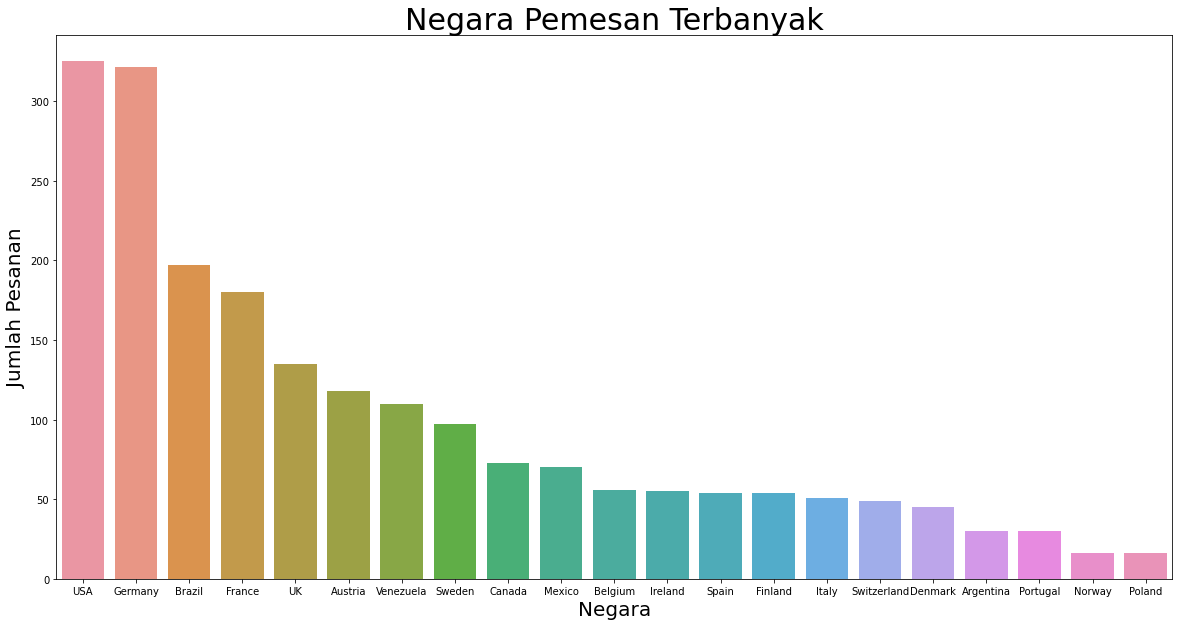

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(tabel1['Country'],
            order = tabel1['Country'].value_counts().index)
plt.xlabel('Negara', size = 20)
plt.ylabel('Jumlah Pesanan', size = 20)
plt.title ('Negara Pemesan Terbanyak', size = 30)
plt.show()

Dari hasil visualisasi diatas terdapat TOP 5 Negara dengan Pemesanan atau quantity order yg paling banyak yaitu USA, Germany, Brazil, France dan UK. terlihar jelas USA dan Germany grafiknya hampir mendekati 1 dengan yg lainnya , dan mempunyai perbedaan yg cukup signifikan yaitu sekitar 100 dengan negara yang lainnya.
mungkin bisa di asumsikan karena negara USA tingkat populasinya yg banyak maka tingkat konsumsinya juga berbanding lurus dengan populasi penduduknya.

strategy yg bisa dilakukan oleh pihak perusahaan yaitu :
- bekerjasama dengan perusahaan Shiping yg dekat dengan negara USA dan germany agar proses pengiriman barang menjadi lebih cepat dan lebih banyak lg yg di konsumsi.
- melihat negara dari benua Eropa memasuki TOP 5 yaitu Germany, France dan UK ada baiknya perusahaan Membuat Gudang Stock Di Eropa agar bisa meminimalisir waktu pengiriman dan biaya pengiriman.
- dan melihat USA adalah negara terbesar dan terbanyak melakukan order adalah keputusan yg tepat untuk Membuat Gudang Stock di US agar bisa meminimalisir waktu pengiriman dan biaya pengiriman.

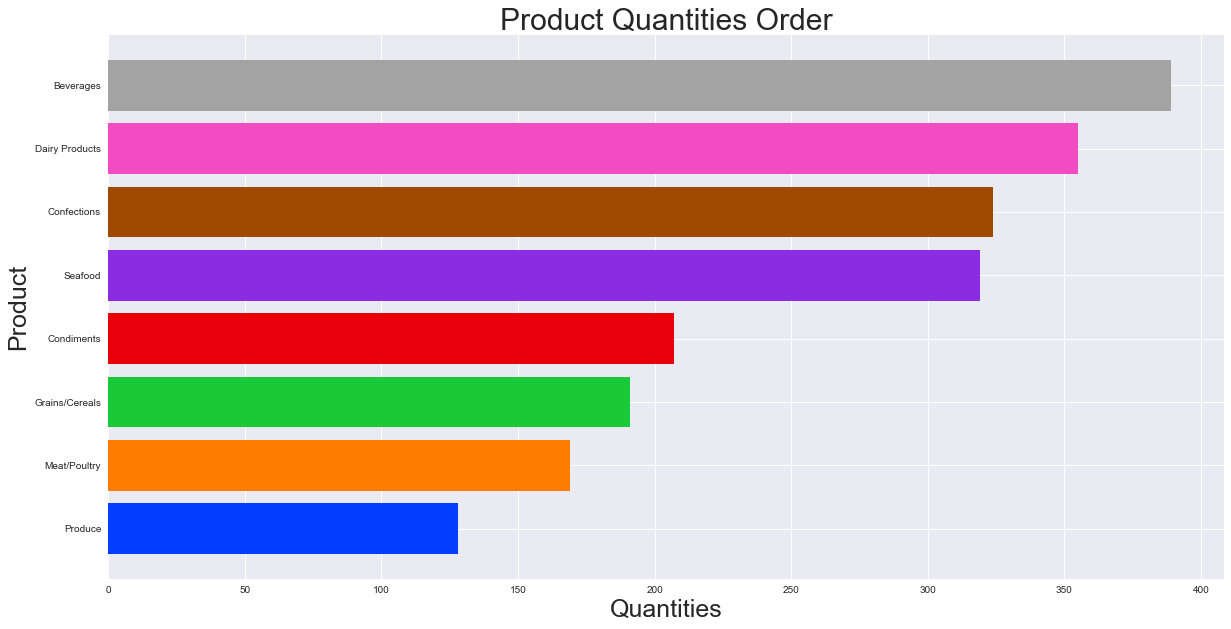

In [28]:
# Product terlaris

productQuanti = tabel1[['CategoryName', 'ProductName']].groupby(['CategoryName']).count().sort_values('ProductName')
x = productQuanti.index
y = productQuanti['ProductName']

plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.barh(x,y, color = sns.color_palette('bright'))
plt.title('Product Quantities Order', size = 30)
plt.xlabel('Quantities', size = 25)
plt.ylabel('Product', size = 25)
plt.show()

Kemudian dari data Visualisasi berdasarkan Kategori produk yg paling banyak di beli atau di Order yaitu Beverages, Dairy Products dan Confeections.
Kategori tersebut mencakup :
- Beverages mencakup Soft drinks, coffees, teas, beers, and ales.
- Dairy Products mencakup Cheeses.
- Confeections mencakup Desserts, candies, and sweet breads.

Melihat keadaan tersebut sangat membuktikan dengan tepat yg dimana konsumsi Beverage, Dairy Products dan Confeections menjadi 3 teratas. kemudian data ini sangat bagus untuk supplier agar mendahulukan pesanan tersebut dikarenakan permintaan yang sangat besar. Lakukan reset terlebih dahulu untuk menempatkan stock dinegara mana agar strategi marketing dapat dilakukan dengan meminimalisir Risk/Resiko.

In [29]:
#quantity product per tahun

yearqty = tabel1[['ShippedDate', 'Quantity']].groupby(pd.DatetimeIndex(tabel1['ShippedDate']).year).sum()
yearqty

,Quantity
ShippedDate,
1996,8717.0
1997,25460.0
1998,15942.0


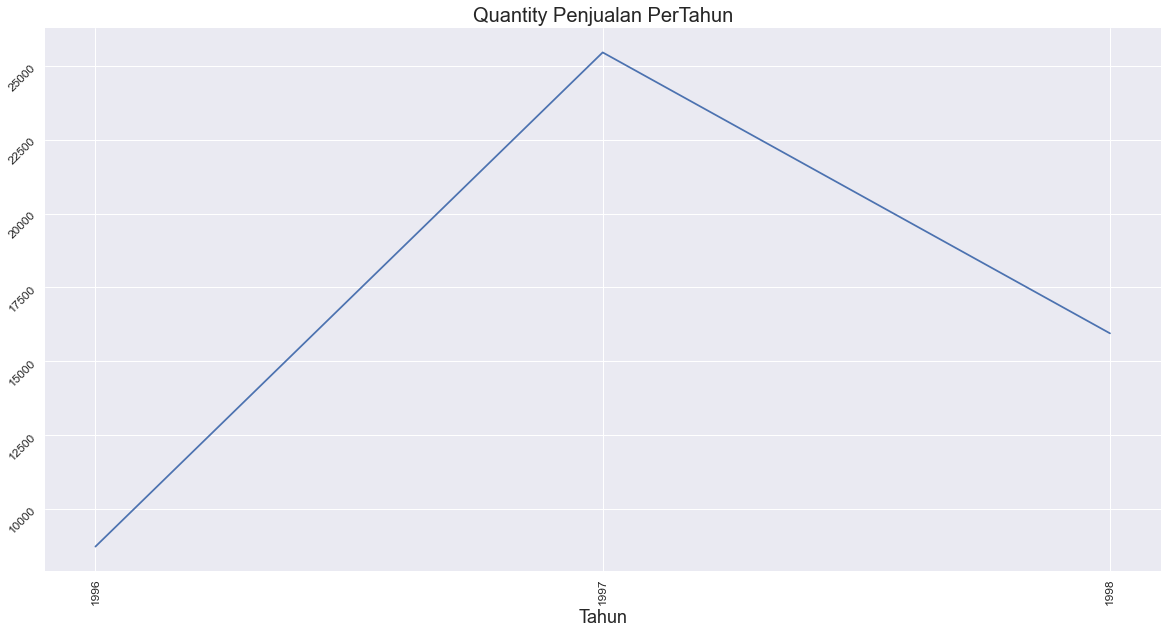

In [30]:
# Line Plot Year By Year Quantity Order

plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(yearqty.index, yearqty['Quantity'])
plt.title('Quantity Penjualan PerTahun', size = 20)
plt.xlabel('Tahun', size = 18)
plt.xticks(yearqty.index, rotation = 90, size = 12)
plt.yticks(rotation = 45, size = 12)


plt.show()

melihat dari visualisasi dari data Quantity Ordder per Tahun adalah pada tahun 1996 quantitynya adalah 8717.0, kemudian naik secara signifikan quantity nya pada tahun 1997 yaitu 25460.0 dan kemudian pada tahun 1998 quantitynya menurun juga secara signifikan yaitu 15942.0.
bisa di simpulkan bahwa dari tahun 1996 ke tahun 1997 tim sales berhasil membuat order quantity secara signifikan bisa dibilang lebih dari 50% meningkat.

Jika kita melihat grafik per bulannya kuantity order :
- Pada Tahun 1996 datanya tidak lengkap hanya tercatat dari bulan 8 hingga bulan 12 dan tercatat pada bulan 11 adalah titik puncak tertinggi order pada tahun 1996 mungkin dikarenakan tingkat konsumsi masyarakat pada akhir tahun meningkat dan titik terendahnya pada bulan 9.
- Pada Tahun 1997 datanya lengkap dari bulan 1 hingga bulan 12. kemudian memiliki titik paling puncak di bulan 10 yatu mendekati akhir Tahun dan titik terendahnya di bulan 11.
- Pada Tahun 1998 Datanya tidak lengkap hanya tercatat dari bulan 1 hinga 5 dan tercatan titik puncaknya ada di bulan 2 dan titik terendahnya di bulan 1.


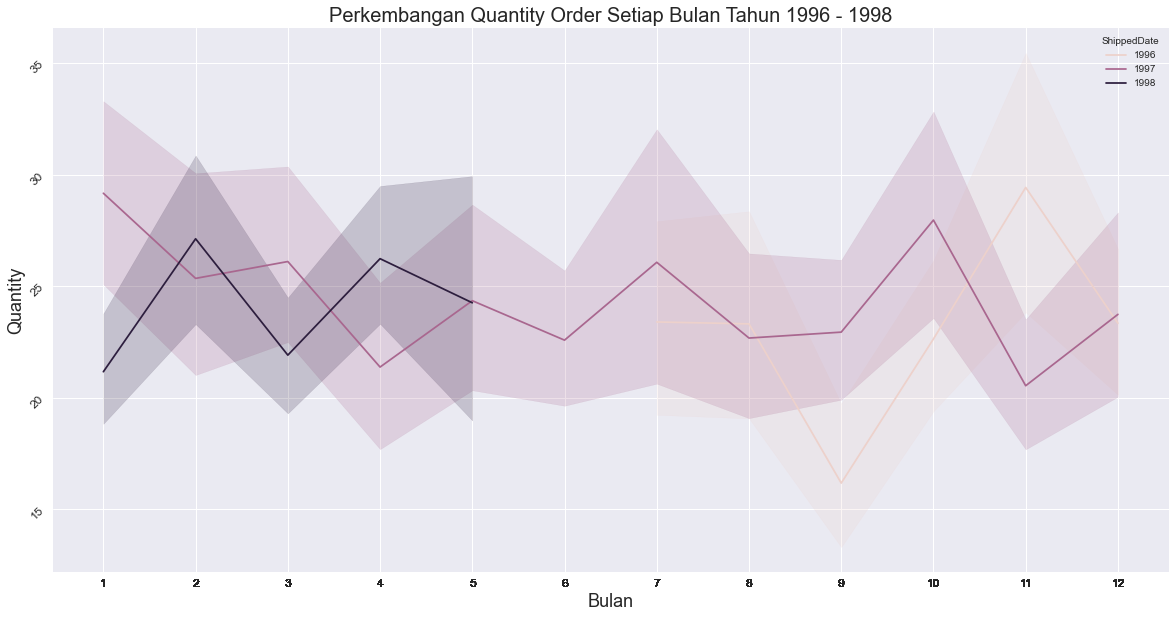

In [31]:
# Line Plot Quantity Order Each Month

plt.figure(figsize=(20,10))
sns.lineplot(data=tabel1, x=pd.DatetimeIndex(tabel1['ShippedDate']).month, y='Quantity', hue = pd.DatetimeIndex(tabel1['ShippedDate']).year)
plt.title('Perkembangan Quantity Order Setiap Bulan Tahun 1996 - 1998', size = 20)
plt.xlabel('Bulan', size = 18)
plt.ylabel('Quantity', size = 18)
plt.xticks(pd.DatetimeIndex(tabel1['ShippedDate']).month, size = 12)
plt.yticks(rotation = 45, size = 12)
plt.show()

In [32]:
from scipy.stats import shapiro

norm, pval = shapiro(tabel1['Quantity'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK BERDISTRIBUS NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA BERDISTRIBUS NORMAL')

Tolak H0 Karena P-Value (3.3119829334163484e-40 < 5%)
DATA TIDAK BERDISTRIBUS NORMAL


In [33]:
tabel2.head(8)

,CategoryName,Banyak_Produk,JumlahQuantity,JumlahHargaBeli
0,Beverages,404,9532,11811.6500
1,Dairy Products,366,9149,9875.8000
2,Confections,334,7906,7549.3000
3,Seafood,330,7681,6290.7800
4,Condiments,216,5298,4605.3000
5,Grains/Cereals,196,4562,4164.3000
6,Meat/Poultry,173,4199,7417.3300
7,Produce,136,2990,4786.4500


## **Perbedaan Quantity Order Tiap Product**

In [34]:
# Uji Perbandingan Nilai Quantity Order Antar Setiap Category Product (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    tabel1[tabel1['CategoryName'] == 'Produce']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Meat/Poultry']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Grains/Cereals']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Condiments']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Seafood']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Confections']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Dairy Products']['Quantity'],
    tabel1[tabel1['CategoryName'] == 'Beverages']['Quantity']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('Terdapat Perbedaan Nilai Median Profit pada Setiap Product Yang Ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('Tidak Terdapat Perbedaan Nilai Median Quantity pada Setiap Product Yang Ada')

Gagal Tolak H0 Karena P-Value (3.3119829334163484e-40 > 5%)
Tidak Terdapat Perbedaan Nilai Median Quantity pada Setiap Product Yang Ada


## **Hubungan Quantity Order dan Discount**

<AxesSubplot:>

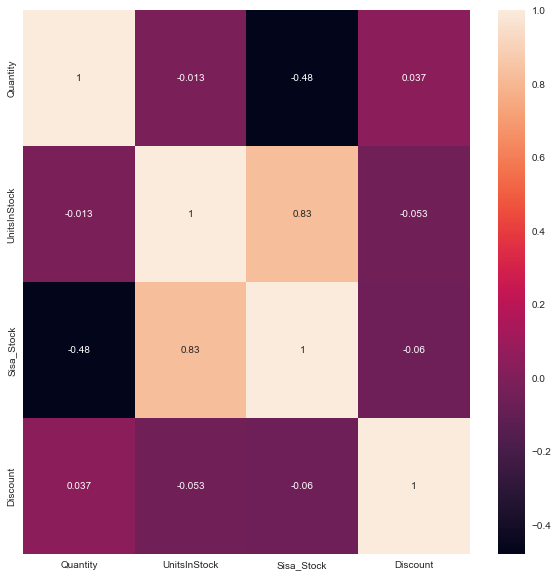

In [35]:
# Korelasi

plt.figure(figsize=(10,10))
sns.heatmap(tabel1[['Quantity','UnitsInStock','Sisa_Stock','Discount']].corr('spearman'), annot=True)

Menggunakan correlasi spearman yg dimana nilai koleralsi yg mendekati 1 memiliki hubungan antar atribut semakin tinggi.


/Users/macbookpro/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity', ylabel='Discount'>

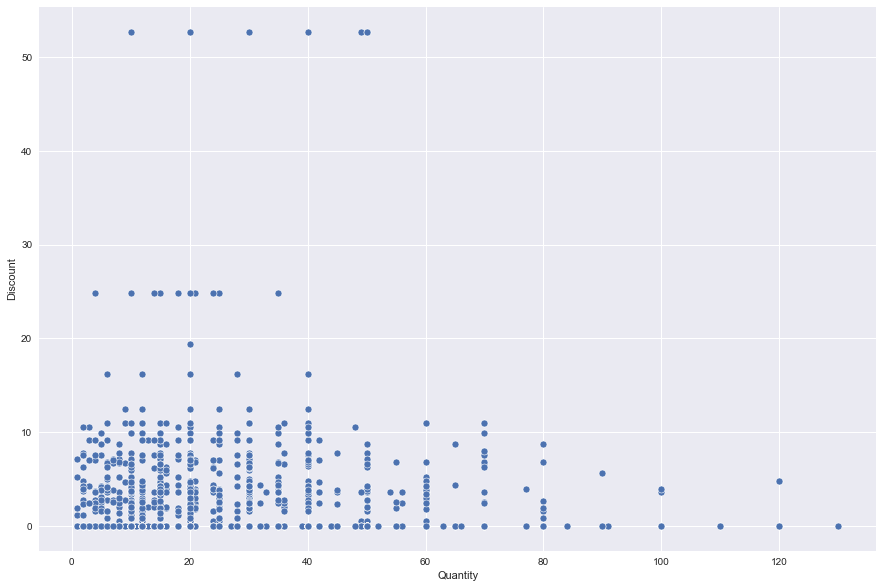

In [36]:
# Korelasi Antara Quantity Order dan Discount

plt.figure(figsize=(15,10))
sns.scatterplot(tabel1['Quantity'], tabel1['Discount'])